# LAB 2: Linear Regression
# X-y split (y is the target variable, in this case, "total claim amount")

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv(r"C:\Users\Juliane\Documents\GitHub\labs_repo\Lessons\LessonsW4\marketing_customer_analysis_clean.csv")

In [3]:
df.head(3)

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2


In [4]:
dfn = df.select_dtypes(include=['int64', 'float64'])
dfc = df.select_dtypes(include=['object'])  

In [5]:
dfc_n = dfc[['response', 'employmentstatus', 'effective_to_date','state', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type','sales_channel', 'vehicle_type']]
dfc_o = dfc[['coverage', 'education', 'vehicle_class']]   

In [6]:
dfc_encoded = pd.get_dummies(dfc_n, columns=['response', 'employmentstatus', 'effective_to_date','state', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type','sales_channel', 'vehicle_type'])
dfc_encoded

,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,effective_to_date_2011-01-01,effective_to_date_2011-01-02,effective_to_date_2011-01-03,...,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
10906,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
10907,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
10908,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
enc = OrdinalEncoder(categories = [['Basic', 'Extended', 'Premium']])
dfc_e1 = enc.fit(dfc_o[['coverage']])
dfc_e1 = pd.DataFrame(enc.transform(dfc_o[['coverage']]))

In [9]:
enc1 = OrdinalEncoder(categories = [['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']])
dfc_e2 = enc1.fit(dfc_o[['education']])
dfc_e2 = pd.DataFrame(enc1.transform(dfc_o[['education']]))

In [10]:
enc2 = OrdinalEncoder(categories = [['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV']])
dfc_e3 = enc2.fit(dfc_o[['vehicle_class']])
dfc_e3 = pd.DataFrame(enc2.transform(dfc_o[['vehicle_class']]))

In [11]:
dfc_e3

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
10905,4.0
10906,0.0
10907,5.0
10908,1.0


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [13]:
dfc_o.dropna(inplace=True)

C:\Users\Juliane\AppData\Local\Temp\ipykernel_19852\3525479505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_o.dropna(inplace=True)


In [14]:
dfc_o.describe()

,coverage,education,vehicle_class
count,10910,10910,10910
unique,3,5,6
top,Basic,Bachelor,Four-Door Car
freq,6660,3272,5834


In [15]:
# Train-test split.
# Scaling/Standardising/PowerTansformer
# Modelling
# Plotting feature importance
# 

#rmse > how big of a mistake we make on average
#r2 > how much of variation of the target variable the model is able to explain

In [16]:
#tipping case 
# >>> y_pred vs y_test
# distribution of residuals
# cjecking for homoscedasticity (constant variance of residuals)
plt.

SyntaxError: invalid syntax (974317780.py, line 5)

In [17]:
dfc_encoded

,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,effective_to_date_2011-01-01,effective_to_date_2011-01-02,effective_to_date_2011-01-03,...,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
10906,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
10907,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
10908,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [18]:
df_new = pd.concat([dfn, dfc_encoded, dfc_e1, dfc_e2, dfc_e3], axis=1)

In [19]:
df_new

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A,0,0,0
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,...,1,0,1,0,0,0,1,0.0,1.0,0.0
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,...,0,1,0,0,1,0,1,0.0,1.0,0.0
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,...,1,0,0,0,1,0,1,0.0,2.0,1.0
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,...,0,0,0,1,0,0,1,1.0,1.0,0.0
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,...,0,0,0,1,0,0,1,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,...,1,0,0,0,0,1,1,2.0,2.0,4.0
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,...,0,0,0,1,0,0,1,0.0,1.0,0.0
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,...,0,0,0,0,0,1,1,1.0,2.0,5.0
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,...,0,0,0,1,0,0,1,2.0,1.0,1.0


'customer_lifetime_value',
                              'income',          'monthly_premium_auto',
             'months_since_last_claim', 'months_since_policy_inception',
           'number_of_open_complaints',            'number_of_policies',
                  'total_claim_amount',                         'month',
       ...
             'renew_offer_type_Offer3',       'renew_offer_type_Offer4',
                 'sales_channel_Agent',          'sales_channel_Branch',
           'sales_channel_Call Center',             'sales_channel_Web',
                      'vehicle_type_A',                               0,
                                     0,                               0

In [22]:
y = pd.DataFrame(df_new["total_claim_amount"])

In [23]:
y

,total_claim_amount
0,292.800000
1,744.924331
2,480.000000
3,484.013411
4,707.925645
...,...
10905,1214.400000
10906,273.018929
10907,381.306996
10908,618.288849


In [24]:
X = df_new
X.drop(columns=["total_claim_amount"], inplace=True)
X.head(3)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_No,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A,0,0,0
0,0,4809.216960,48029,61,7.0,52,0.0,9,2,1,...,1,0,1,0,0,0,1,0.0,1.0,0.0
1,1,2228.525238,0,64,3.0,26,0.0,1,1,1,...,0,1,0,0,1,0,1,0.0,1.0,0.0
2,2,14947.917300,22139,100,34.0,31,0.0,2,2,1,...,1,0,0,0,1,0,1,0.0,2.0,1.0


In [25]:
X.columns = X.columns.astype(str)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [28]:
# Standardize the data (after the data split!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_No,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A,0,0,0
0,1.056252,-0.298649,0.352458,-0.556749,0.007560,-1.468668,0.007752,0.415700,-0.940879,0.395145,...,-0.432636,-0.353529,-0.771520,-0.622294,-0.494570,2.369470,0.0,-0.729727,-1.193683,0.939482
1,-0.926858,-0.392857,-1.239629,-0.556749,0.402051,0.821920,-0.429234,-0.000509,-0.940879,0.395145,...,2.311414,-0.353529,1.296143,-0.622294,-0.494570,-0.422035,0.0,-0.729727,0.663990,-0.757018
2,1.016087,-0.821583,-0.504792,-0.817683,0.094730,1.609310,-0.429234,-0.832927,-0.940879,-2.530716,...,-0.432636,-0.353529,-0.771520,1.606957,-0.494570,-0.422035,0.0,-0.729727,-1.193683,-0.757018
3,1.293422,2.879646,-1.239629,0.544971,0.811813,-1.003392,-0.429234,-0.416718,1.062836,0.395145,...,2.311414,-0.353529,-0.771520,1.606957,-0.494570,-0.422035,0.0,-0.729727,-0.264847,0.091232
4,-0.463357,1.002198,1.985075,-0.585742,2.041098,-0.430745,-0.429234,-0.416718,1.062836,0.395145,...,-0.432636,-0.353529,-0.771520,-0.622294,2.021957,-0.422035,0.0,-0.729727,2.521662,0.939482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,-1.622111,-0.809832,0.340586,-0.904661,-1.339436,0.106112,-0.429234,-0.832927,1.062836,0.395145,...,-0.432636,-0.353529,-0.771520,-0.622294,2.021957,-0.422035,0.0,-0.729727,-0.264847,0.939482
8178,-1.708499,0.201285,1.266199,0.631949,-0.417472,-0.144422,-0.429234,-0.000509,1.062836,0.395145,...,2.311414,-0.353529,-0.771520,-0.622294,2.021957,-0.422035,0.0,2.313405,-1.193683,-0.757018
8179,0.828965,-0.455121,0.985263,-0.933653,-1.134555,-0.931811,-0.429234,2.496746,1.062836,0.395145,...,-0.432636,2.828622,-0.771520,1.606957,-0.494570,-0.422035,0.0,-0.729727,-1.193683,0.939482
8180,0.477354,1.953516,-1.239629,0.429000,-0.007711,-1.110764,-0.429234,-0.416718,-0.940879,0.395145,...,-0.432636,2.828622,-0.771520,-0.622294,-0.494570,2.369470,0.0,-0.729727,-0.264847,0.091232


In [30]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled 

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_No,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A,0,0,0
0,-1.335211,-0.760433,-0.356162,-0.643727,-1.134555,-0.251793,-0.429234,-0.832927,1.062836,-2.530716,...,-0.432636,-0.353529,1.296143,-0.622294,-0.49457,-0.422035,0.0,-0.729727,0.663990,0.939482
1,-0.000174,-0.790735,-0.560557,-0.643727,-0.007711,1.179825,0.707991,-0.832927,1.062836,0.395145,...,-0.432636,2.828622,-0.771520,1.606957,-0.49457,-0.422035,0.0,-0.729727,-0.264847,0.939482
2,1.503815,-0.073986,-1.239629,0.400008,-0.929675,0.535597,-0.429234,2.080537,-0.940879,0.395145,...,-0.432636,-0.353529,1.296143,-0.622294,-0.49457,-0.422035,0.0,-0.729727,0.663990,0.091232
3,-0.636771,1.261077,0.403474,-0.672720,-0.110151,-0.752859,2.982439,-0.416718,1.062836,0.395145,...,2.311414,-0.353529,1.296143,-0.622294,-0.49457,-0.422035,0.0,-0.729727,-1.193683,0.939482
4,-1.516277,0.183538,-0.006667,0.689934,1.528896,-0.967602,-0.429234,0.831910,1.062836,0.395145,...,-0.432636,2.828622,-0.771520,1.606957,-0.49457,-0.422035,0.0,-0.729727,-1.193683,0.091232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,-0.119715,1.298055,-0.220130,-0.614734,-1.441877,-1.504458,1.845215,-0.416718,-0.940879,0.395145,...,-0.432636,-0.353529,-0.771520,1.606957,-0.49457,-0.422035,0.0,-0.729727,0.663990,-0.757018
2724,1.470981,-0.426642,-0.280149,0.979860,-1.339436,1.144034,-0.429234,-0.832927,-0.940879,0.395145,...,-0.432636,2.828622,1.296143,-0.622294,-0.49457,-0.422035,0.0,0.791839,-0.264847,0.091232
2725,-0.632946,-0.181434,-1.239629,0.052096,-0.007711,-1.432878,-0.429234,0.831910,1.062836,0.395145,...,-0.432636,-0.353529,1.296143,-0.622294,-0.49457,-0.422035,0.0,0.791839,-0.264847,-0.757018
2726,1.212134,-0.593347,1.812075,0.197059,-1.441877,0.249273,-0.429234,-0.832927,1.062836,0.395145,...,-0.432636,-0.353529,-0.771520,1.606957,-0.49457,-0.422035,0.0,-0.729727,-1.193683,0.091232


# Apply linear regression.

In [31]:
# Creating our model
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
model = lm.fit(X_train_scaled, y_train) 

In [34]:
model.coef_

array([[ 1.53767849e+00, -1.05575659e+00, -8.59687508e+00,
         1.73681189e+02,  2.14119666e+00, -1.44304089e+00,
        -2.56697491e+00,  2.76944040e+00,  2.82574265e+13,
        -1.48891904e+14, -1.48891904e+14, -7.24586794e+13,
        -1.67745290e+14, -7.13478258e+13, -6.08124469e+13,
        -1.50844784e+14, -9.75257231e+13, -1.00303239e+14,
        -1.05623616e+14, -7.82398058e+13, -9.96166442e+13,
        -9.05638398e+13, -9.46608736e+13, -9.53856998e+13,
        -9.71725491e+13, -1.11586752e+14, -1.01661493e+14,
        -9.09444025e+13, -9.50240235e+13, -9.57459190e+13,
        -9.61046976e+13, -9.75257231e+13, -1.08178018e+14,
        -9.61046976e+13, -1.05623616e+14, -9.64620517e+13,
        -1.01661493e+14, -8.70594584e+13, -1.00644651e+14,
        -9.64620517e+13, -9.28224109e+13, -1.07862308e+14,
        -1.13996036e+14, -1.00644651e+14, -9.92714346e+13,
        -9.42962330e+13, -1.09119190e+14, -1.04764556e+14,
        -1.05893997e+14, -1.10287983e+14, -1.13115434e+1

In [35]:
model.intercept_

array([433.89081597])

# Model Interpretation.

In [36]:
import numpy as np

In [37]:
#Predict random

In [38]:
# didnt do this now! ...  random_tca = np.array([[2810.464447, 26790, 71, 4.0, 41, 0.0, 1, 2]]).reshape(1,-1)

In [39]:
# model.predict(random_tca)

# Apply linear regression.

In [40]:
y_pred = model.predict(X_test_scaled)


In [41]:
y_test.shape

(2728, 1)

In [42]:
np.array(y_test)

array([[340.8     ],
       [195.153339],
       [770.4     ],
       ...,
       [684.      ],
       [ 25.713622],
       [497.684017]])

In [43]:
real_vs_pred = pd.DataFrame({'y_test': y_test["total_claim_amount"], 'y_pred':y_pred[:,0]})

In [44]:
real_vs_pred

,y_test,y_pred
1250,340.800000,388.803401
5438,195.153339,303.902866
10156,770.400000,693.959344
3441,336.000000,367.064830
682,561.600000,640.689523
...,...,...
5063,345.600000,375.068411
10053,664.280864,673.020796
3453,684.000000,652.020489
9241,25.713622,220.189523


# Compute the Error metrics

In [45]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [46]:
mse(real_vs_pred['y_test'], real_vs_pred['y_pred'])

21494.258632481193

In [47]:
#rmse

import math
math.sqrt(42443.37163762149)

206.01789154736412

In [48]:
r2_score(real_vs_pred['y_test'], real_vs_pred['y_pred'])

0.7636770407228934

In [49]:
mae(real_vs_pred['y_test'], real_vs_pred['y_pred'])

97.66743112463504

In [50]:
import matplotlib.pyplot as plt

In [51]:
y_test

,total_claim_amount
1250,340.800000
5438,195.153339
10156,770.400000
3441,336.000000
682,561.600000
...,...
5063,345.600000
10053,664.280864
3453,684.000000
9241,25.713622


In [52]:
import statsmodels.api as sm

In [53]:
X_train_const = sm.add_constant(X_train.to_numpy())

model_ols = sm.OLS(y_train, X_train_const).fit()
predictions_train = model_ols.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_pred = model_ols.predict(X_test_const)
print_model = model_ols.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:58:39   Log-Likelihood:                -51902.
No. Observations:                8182   AIC:                         1.040e+05
Df Residuals:                    8084   BIC:                         1.047e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0005      0.000      0.998      0.318      -0.000       0.001
x2            -0.0001      0.000     -0.451      0.652      -0.001       0.000
x3            -0.0003    9.1e-05     -3.076      0.002      -0.000      -0.000
x4             5.0344      0.068     74.378      0.000       4.902       5.167
x5             0.2325      0.159      1.465      0.143      -0.079       0.544
x6            -0.0470      0.056     -0.841      0.401      -0.157       0.063
x7            -2.8196      1.756     -1.605      0.108      -6.263       0.624
x8             1.1013      0.650      1.693      0.090      -0.173       2.376
x9            -1.4334      2.815     -0.509      0.611      -6.951       4.084
x10            1.8167      2.574      0.706      0.480      -3.229       6.862
x11          -25.4703      2.923     -8.713      0.000     -31.200     -19.740
x12           -8.7865      6.336     -1.387      0.166     -21.207       3.634
x13          -24.8533      4.445     -5.592      0.000     -33.566     -16.140
x14          -12.1633      6.403     -1.900      0.058     -24.715       0.389
x15          -26.4724      7.708     -3.435      0.001     -41.581     -11.364
x16           48.6217      4.379     11.103      0.000      40.038      57.206
x17            8.2180     11.731      0.701      0.484     -14.777      31.213
x18            4.2570     11.407      0.373      0.709     -18.104      26.618
x19            6.2271     10.839      0.575      0.566     -15.020      27.474
x20           -7.7532     14.581     -0.532      0.595     -36.336      20.830
x21           12.4294     11.497      1.081      0.280     -10.107      34.966
x22           12.5263     12.618      0.993      0.321     -12.208      37.261
x23          -19.3417     12.077     -1.602      0.109     -43.015       4.332
x24          -10.1026     11.966     -0.844      0.399     -33.559      13.354
x25          -22.9294     11.774     -1.947      0.052     -46.010       0.151
x26           -0.2042     10.280     -0.020      0.984     -20.356      19.947
x27           -8.5392     11.262     -0.758      0.448     -30.616      13.537
x28           -4.4126     12.555     -0.351      0.725     -29.024      20.199
x29           10.2929     12.028      0.856      0.392     -13.284      33.870
x30           -6.6819     11.967     -0.558      0.577     -30.139      16.776
x31            0.3943     11.882      0.033      0.974     -22.897      23.685
x32          -12.9229     11.716     -1.103      0.270     -35.890      10.044
x33           -9.6894     10.594     -0.915      0.360     -30.457      11.078
x34          -19.7959     11.907     -1.662      0.096     -43.137       3.546
x35           -9.5850     10.838     -0.884      0.376     -30.830      11.660
x36           14.3806     11.861      1.212      0.225      -8.870      37.632
x3

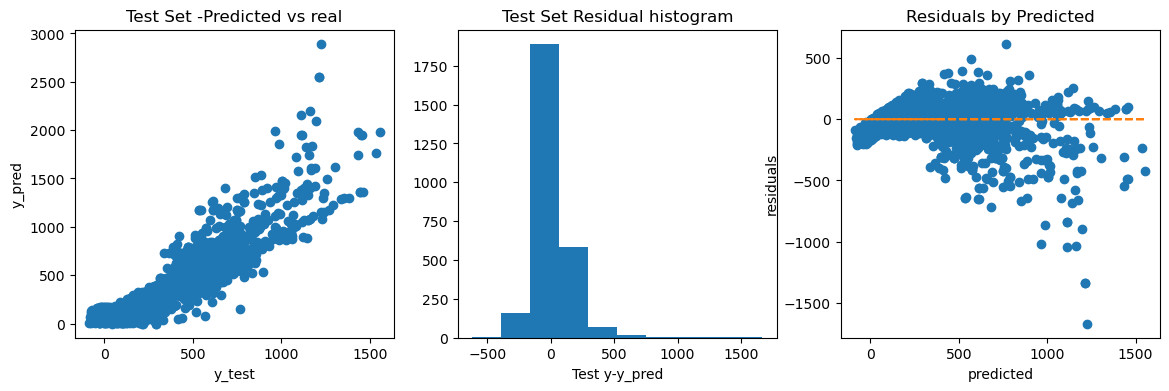

In [54]:
## Plot y_pred vs y_test
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test['total_claim_amount'], 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.
# Does it ressemble a normal distribution?
ax[1].hist(y_test['total_claim_amount'] - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity
ax[2].plot(y_pred,np.array(y_pred)-np.array(y_test['total_claim_amount']),"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#Plotting the feature importances

In [55]:
coefficients = model.coef_.reshape(-1,1)
coefficients = coefficients.reshape(112,)
coefficients.shape

(112,)

In [56]:
feature_importances = pd.DataFrame({'variable':X.columns, 'coefficient': coefficients})

In [57]:
feature_importances

,variable,coefficient
0,unnamed:_0,1.537678e+00
1,customer_lifetime_value,-1.055757e+00
2,income,-8.596875e+00
3,monthly_premium_auto,1.736812e+02
4,months_since_last_claim,2.141197e+00
...,...,...
107,sales_channel_Web,-8.548146e+13
108,vehicle_type_A,0.000000e+00
109,0,-3.619141e+00
110,0,-4.918213e+00


<Axes: xlabel='variable', ylabel='coefficient'>

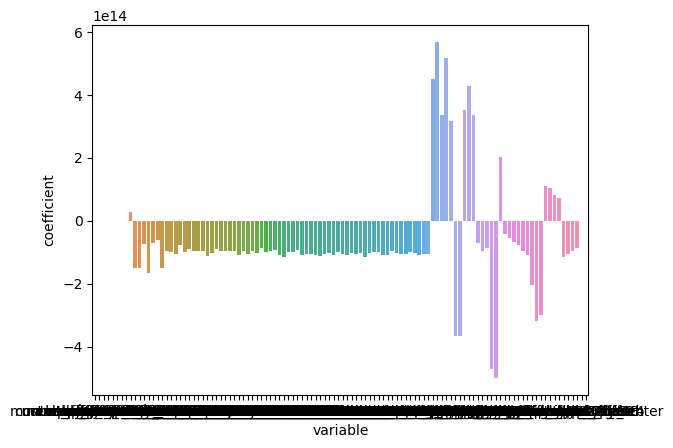

In [58]:
sns.barplot(x=feature_importances['variable'], y=feature_importances['coefficient'])

In [59]:
import warnings
warnings.filterwarnings("ignore")

### Lasso and Ridge

In [ ]:
#1. 0bservations on model performances: 
# at 0, both get Train -> 0.7731426782767916, Test -> 0.7638127777982193
# at 0.5 and 1 -> Ridge doesnt change but but Lasso decreases very slightly
# at 1000 -> both decrease but Ridge much less than Lasso
# so generally Ridge is much more stable

In [66]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=1000)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.502934206533036, Test -> 0.5126803636915738


In [67]:
model=Ridge(alpha=1000) #alpha instead of lambda cause thats a python keyword
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.7455512323669332, Test -> 0.7404404369133599


### 2. Define a function...

In [77]:
#in class solution

list_of_m = [LinearRegression(),Lasso(),Ridge()]

def lm_3(list_of_models, X_train, y_train, X_test, y_test):
    for model in list_of_models:
        lm = model
        lm = lm.fit(X_train, y_train)
        y_pred = lm.predict(X_test)
        y_pred_train = lm.predict(X_train)
        r2_train = r2_score(y_train,y_pred_train)
        r2 = r2_score(y_test,y_pred)
    
        return r2_train, r2_test

In [78]:
lm_3(list_of_m, X_train_scaled, y_train_t, X_test_scaled, y_test_t)

NameError: name 'y_train_t' is not defined

In [71]:
from sklearn.metrics import mean_squared_error

def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model's performance 
        mse = mean_squared_error(y_test, y_pred)

        # Store the results
        results[model_name] = {
            'model': model,
            'mse': mse
        }

    return results

In [72]:
# Example usage:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models_to_try = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

# Train and evaluate the models
results = train_and_evaluate(models_to_try, X_train, y_train, X_test, y_test)

# Print the results
for model_name, result in results.items():
    print(f"{model_name} MSE: {result['mse']}")


Linear Regression MSE: 18823.82666312898
Lasso MSE: 18757.07627779608
Ridge MSE: 18821.12345674912


In [73]:
import statsmodels.api as sm

def select_features_pvalue(X, y, threshold=0.05):
    X_const = sm.add_constant(X)  # add a constant term
    model = sm.OLS(y, X_const).fit()

    # Get p-values for each feature
    p_values = model.pvalues[1:]  # exclude the constant term

    # Select features based on the threshold
    selected_features = X.columns[p_values < threshold]

    return selected_features

# Example usage:
selected_features_pvalue = select_features_pvalue(X_train, y_train, threshold=0.05)
X_train_selected_pvalue = X_train[selected_features_pvalue]
X_test_selected_pvalue = X_test[selected_features_pvalue]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 112 but corresponding boolean dimension is 111

In [74]:
from sklearn.feature_selection import RFE

def select_features_rfe(model, X_train, y_train, num_features):
    rfe = RFE(model, num_features)
    rfe.fit(X_train, y_train)

    selected_features = X_train.columns[rfe.support_]

    return selected_features

# Example usage:
model = LinearRegression()  # or any other model
num_features_to_select = 5  # set the desired number of features
selected_features_rfe = select_features_rfe(model, X_train, y_train, num_features_to_select)
X_train_selected_rfe = X_train[selected_features_rfe]
X_test_selected_rfe = X_test[selected_features_rfe]


TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [75]:
# Train and evaluate models with selected features
results_pvalue = train_and_evaluate(models_to_try, X_train_selected_pvalue, y_train, X_test_selected_pvalue, y_test)
results_rfe = train_and_evaluate(models_to_try, X_train_selected_rfe, y_train, X_test_selected_rfe, y_test)


NameError: name 'X_train_selected_pvalue' is not defined